In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

In [2]:
# Configurações
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'R$ {x:,.2f}')

In [4]:
# Para Jupyter Notebook
%matplotlib inline

print("Bibliotecas importadas com sucesso!")
print("Loja Imaginária S.A - Análise de Vendas 2024")
print("="*80)

Bibliotecas importadas com sucesso!
Loja Imaginária S.A - Análise de Vendas 2024


In [5]:
# Carregar dataset
df = pd.read_csv('vendas_loja_imaginaria_2024.csv')

print("\n" + "="*80)
print("CARREGAMENTO DOS DADOS")
print("="*80)

# Primeiras linhas
print("\nPrimeiras 10 linhas do dataset:")
display(df.head(10))



CARREGAMENTO DOS DADOS

Primeiras 10 linhas do dataset:


,OrderID,ClienteID,Produto,Categoria,Quantidade,PrecoUnitario,DataCompra,Regiao
0,ORD000001,CLI00370,Acer Aspire 5,Notebook,1,3299,2024-01-17,Centro-Oeste
1,ORD000002,CLI00144,HP Pavilion 14,Notebook,1,4199,2024-01-12,Nordeste
2,ORD000003,CLI00167,Xiaomi Redmi Note 13,Celular,2,1799,2024-01-14,Nordeste
3,ORD000004,CLI00622,Dell Inspiron 15,Notebook,1,4999,2024-01-18,Sul
4,ORD000005,CLI00262,Acer Aspire 5,Notebook,1,3299,2024-01-22,Sul
5,ORD000006,CLI00552,Motorola Moto G84,Celular,1,1599,2024-01-02,Centro-Oeste
6,ORD000007,CLI00473,Xiaomi Redmi Note 13,Celular,2,1799,2024-01-25,Sudeste
7,ORD000008,CLI00712,Xiaomi Redmi Note 13,Celular,1,1799,2024-01-09,Sudeste
8,ORD000009,CLI00077,HP Pavilion 14,Notebook,1,4199,2024-01-22,Nordeste
9,ORD000010,CLI00284,Motorola Moto G84,Celular,1,1599,2024-01-03,Centro-Oeste


In [6]:
print("\nInformações do Dataset:")
df.info()


Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OrderID        1293 non-null   object
 1   ClienteID      1293 non-null   object
 2   Produto        1293 non-null   object
 3   Categoria      1293 non-null   object
 4   Quantidade     1293 non-null   int64 
 5   PrecoUnitario  1293 non-null   int64 
 6   DataCompra     1293 non-null   object
 7   Regiao         1293 non-null   object
dtypes: int64(2), object(6)
memory usage: 80.9+ KB


In [7]:
print(f"\nDimensões: {df.shape[0]:,} pedidos x {df.shape[1]} colunas")



Dimensões: 1,293 pedidos x 8 colunas


In [ ]:
# Verificações de qualidade
print("\n  VERIFICAÇÕES DE QUALIDADE:")
print(f"   • Valores nulos: {df.isnull().sum().sum()}")
print(f"   • Duplicatas: {df.duplicated().sum()}")
print(f"   • Pedidos únicos: {df['OrderID'].nunique():,}")
print(f"   • Clientes únicos: {df['ClienteID'].nunique():,}")


In [9]:
print("\n" + "="*80)
print("PREPARAÇÃO DOS DADOS")
print("="*80)


PREPARAÇÃO DOS DADOS


In [10]:
df['DataCompra'] = pd.to_datetime(df['DataCompra'])


In [11]:
df['ReceitaTotal'] = df['Quantidade'] * df['PrecoUnitario']


In [12]:
# Extrair informações temporais
df['Ano'] = df['DataCompra'].dt.year
df['Mes'] = df['DataCompra'].dt.month
df['MesNome'] = df['DataCompra'].dt.month_name()
df['DiaSemana'] = df['DataCompra'].dt.day_name()
df['Trimestre'] = df['DataCompra'].dt.quarter

In [13]:
# Mapear meses para português
meses_pt = {
    'January': 'Janeiro', 'February': 'Fevereiro', 'March': 'Março',
    'April': 'Abril', 'May': 'Maio', 'June': 'Junho',
    'July': 'Julho', 'August': 'Agosto', 'September': 'Setembro',
    'October': 'Outubro', 'November': 'Novembro', 'December': 'Dezembro'
}
df['MesNome'] = df['MesNome'].map(meses_pt)

In [14]:
print("Colunas criadas: ReceitaTotal, Ano, Mes, MesNome, DiaSemana, Trimestre")


Colunas criadas: ReceitaTotal, Ano, Mes, MesNome, DiaSemana, Trimestre


In [16]:
print("\nDataset atualizado:")
display(df.head())


Dataset atualizado:


,OrderID,ClienteID,Produto,Categoria,Quantidade,PrecoUnitario,DataCompra,Regiao,ReceitaTotal,Ano,Mes,MesNome,DiaSemana,Trimestre
0,ORD000001,CLI00370,Acer Aspire 5,Notebook,1,3299,2024-01-17,Centro-Oeste,3299,2024,1,Janeiro,Wednesday,1
1,ORD000002,CLI00144,HP Pavilion 14,Notebook,1,4199,2024-01-12,Nordeste,4199,2024,1,Janeiro,Friday,1
2,ORD000003,CLI00167,Xiaomi Redmi Note 13,Celular,2,1799,2024-01-14,Nordeste,3598,2024,1,Janeiro,Sunday,1
3,ORD000004,CLI00622,Dell Inspiron 15,Notebook,1,4999,2024-01-18,Sul,4999,2024,1,Janeiro,Thursday,1
4,ORD000005,CLI00262,Acer Aspire 5,Notebook,1,3299,2024-01-22,Sul,3299,2024,1,Janeiro,Monday,1


In [17]:
# Estatísticas descritivas
print("\nESTATÍSTICAS DESCRITIVAS:")
display(df[['Quantidade', 'PrecoUnitario', 'ReceitaTotal']].describe())


ESTATÍSTICAS DESCRITIVAS:


,Quantidade,PrecoUnitario,ReceitaTotal
count,"R$ 1,293.00","R$ 1,293.00","R$ 1,293.00"
mean,R$ 1.10,"R$ 4,683.15","R$ 5,094.34"
std,R$ 0.29,"R$ 2,350.89","R$ 2,856.69"
min,R$ 1.00,"R$ 1,599.00","R$ 1,599.00"
25%,R$ 1.00,"R$ 2,899.00","R$ 2,899.00"
50%,R$ 1.00,"R$ 3,999.00","R$ 4,199.00"
75%,R$ 1.00,"R$ 6,499.00","R$ 6,499.00"
max,R$ 2.00,"R$ 9,999.00","R$ 15,998.00"


In [18]:
print("\n" + "="*80)
print("KPIS PRINCIPAIS - LOJA IMAGINÁRIA S.A")
print("="*80)


KPIS PRINCIPAIS - LOJA IMAGINÁRIA S.A


In [19]:
# Calcular KPIs
receita_total = df['ReceitaTotal'].sum()
num_pedidos = df['OrderID'].nunique()
num_clientes = df['ClienteID'].nunique()
ticket_medio = df.groupby('OrderID')['ReceitaTotal'].sum().mean()
produtos_vendidos = df['Quantidade'].sum()
ticket_medio_cliente = df.groupby('ClienteID')['ReceitaTotal'].sum().mean()

In [20]:
print(f"\n    Receita Total:              R$ {receita_total:,.2f}")
print(f"      Número de Pedidos:          {num_pedidos:,}")
print(f"      Clientes Únicos:            {num_clientes:,}")
print(f"      Ticket Médio (por pedido):  R$ {ticket_medio:,.2f}")
print(f"      Ticket Médio (por cliente): R$ {ticket_medio_cliente:,.2f}")
print(f"      Produtos Vendidos:          {produtos_vendidos:,} unidades")
print(f"      Pedidos por Cliente:        {num_pedidos/num_clientes:.2f}")


    Receita Total:              R$ 6,586,984.00
      Número de Pedidos:          1,293
      Clientes Únicos:            642
      Ticket Médio (por pedido):  R$ 5,094.34
      Ticket Médio (por cliente): R$ 10,260.10
      Produtos Vendidos:          1,416 unidades
      Pedidos por Cliente:        2.01


In [21]:
print("\n" + "="*80)
print(" RESPONDENDO PERGUNTAS DE NEGÓCIO")
print("="*80)


 RESPONDENDO PERGUNTAS DE NEGÓCIO


In [22]:
print("\n" + "-"*80)
print(" PERGUNTA 1: Qual produto gera maior receita para a Loja Imaginária S.A?")
print("-"*80)


--------------------------------------------------------------------------------
 PERGUNTA 1: Qual produto gera maior receita para a Loja Imaginária S.A?
--------------------------------------------------------------------------------


In [23]:
receita_por_produto = df.groupby('Produto').agg({
    'ReceitaTotal': 'sum',
    'Quantidade': 'sum',
    'OrderID': 'count'
}).round(2)
receita_por_produto.columns = ['Receita Total', 'Unidades Vendidas', 'Nº Pedidos']
receita_por_produto = receita_por_produto.sort_values('Receita Total', ascending=False)

In [24]:
print("\n TOP 10 PRODUTOS POR RECEITA:")
display(receita_por_produto.head(10))


 TOP 10 PRODUTOS POR RECEITA:


,Receita Total,Unidades Vendidas,Nº Pedidos
Produto,,,
iPhone 15 Pro,895888,112,99
iPhone 14,815864,136,113
Samsung Galaxy S24,714890,110,94
MacBook Air M2,659934,66,66
LG Gram 17,519935,65,65
Xiaomi 13T Pro,411897,103,90
Samsung Galaxy Book,379431,69,69
Motorola Edge 40,353678,122,100
Dell Inspiron 15,304939,61,61


In [25]:
produto_top = receita_por_produto.index[0]
receita_top = receita_por_produto.iloc[0]['Receita Total']
print(f"\n RESPOSTA: O produto '{produto_top}' gera a maior receita: R$ {receita_top:,.2f}")


 RESPOSTA: O produto 'iPhone 15 Pro' gera a maior receita: R$ 895,888.00


In [26]:
print("\n" + "-"*80)
print(" PERGUNTA 2: Qual categoria domina as vendas (Celulares vs Notebooks)?")
print("-"*80)


--------------------------------------------------------------------------------
 PERGUNTA 2: Qual categoria domina as vendas (Celulares vs Notebooks)?
--------------------------------------------------------------------------------


In [27]:
analise_categoria = df.groupby('Categoria').agg({
    'ReceitaTotal': 'sum',
    'Quantidade': 'sum',
    'OrderID': 'count',
    'PrecoUnitario': 'mean'
}).round(2)
analise_categoria.columns = ['Receita Total', 'Unidades Vendidas', 'Nº Pedidos', 'Preço Médio']


In [28]:
print("\n ANÁLISE POR CATEGORIA:")
display(analise_categoria)


 ANÁLISE POR CATEGORIA:


,Receita Total,Unidades Vendidas,Nº Pedidos,Preço Médio
Categoria,,,,
Celular,3791997,903,780,"R$ 4,179.90"
Notebook,2794987,513,513,"R$ 5,448.32"


In [29]:
# Percentuais
print("\n PARTICIPAÇÃO POR CATEGORIA:")
for categoria in analise_categoria.index:
    perc_receita = (analise_categoria.loc[categoria, 'Receita Total'] / receita_total) * 100
    perc_volume = (analise_categoria.loc[categoria, 'Nº Pedidos'] / num_pedidos) * 100
    print(f"   {categoria}:")
    print(f"      • Receita: {perc_receita:.1f}% do total")
    print(f"      • Volume: {perc_volume:.1f}% dos pedidos")


 PARTICIPAÇÃO POR CATEGORIA:
   Celular:
      • Receita: 57.6% do total
      • Volume: 60.3% dos pedidos
   Notebook:
      • Receita: 42.4% do total
      • Volume: 39.7% dos pedidos


In [30]:
print("\n" + "-"*80)
print(" PERGUNTA 3: Como evoluem as vendas mês a mês?")
print("-"*80)


--------------------------------------------------------------------------------
 PERGUNTA 3: Como evoluem as vendas mês a mês?
--------------------------------------------------------------------------------


In [31]:
vendas_mensais = df.groupby('Mes').agg({
    'ReceitaTotal': 'sum',
    'OrderID': 'count'
}).round(2)
vendas_mensais.columns = ['Receita', 'Nº Pedidos']
vendas_mensais['Ticket Médio'] = (vendas_mensais['Receita'] / vendas_mensais['Nº Pedidos']).round(2)


In [32]:
# Adicionar nomes dos meses
meses_ordem = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
               'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
vendas_mensais['Mês'] = meses_ordem
vendas_mensais = vendas_mensais[['Mês', 'Receita', 'Nº Pedidos', 'Ticket Médio']]

In [33]:
print("\n EVOLUÇÃO MENSAL DE VENDAS:")
display(vendas_mensais)


 EVOLUÇÃO MENSAL DE VENDAS:


,Mês,Receita,Nº Pedidos,Ticket Médio
Mes,,,,
1,Janeiro,505391,93,"R$ 5,434.31"
2,Fevereiro,367420,76,"R$ 4,834.47"
3,Março,465098,96,"R$ 4,844.77"
4,Abril,428707,85,"R$ 5,043.61"
5,Maio,535478,110,"R$ 4,867.98"
6,Junho,498089,100,"R$ 4,980.89"
7,Julho,429210,81,"R$ 5,298.89"
8,Agosto,462496,93,"R$ 4,973.08"
9,Setembro,477998,97,"R$ 4,927.81"


In [34]:
# Identificar picos
mes_maior_receita = vendas_mensais['Receita'].idxmax()
mes_maior_volume = vendas_mensais['Nº Pedidos'].idxmax()
print(f"\n Maior receita: {meses_ordem[mes_maior_receita-1]} (R$ {vendas_mensais.loc[mes_maior_receita, 'Receita']:,.2f})")
print(f" Maior volume: {meses_ordem[mes_maior_volume-1]} ({int(vendas_mensais.loc[mes_maior_volume, 'Nº Pedidos'])} pedidos)")


 Maior receita: Dezembro (R$ 1,088,887.00)
 Maior volume: Dezembro (200 pedidos)


In [35]:
# PERGUNTA 4: Qual região concentra mais clientes e pedidos?
print("\n" + "-"*80)
print(" PERGUNTA 4: Qual região concentra mais clientes e pedidos?")
print("-"*80)


--------------------------------------------------------------------------------
 PERGUNTA 4: Qual região concentra mais clientes e pedidos?
--------------------------------------------------------------------------------


In [36]:
analise_regional = df.groupby('Regiao').agg({
    'ReceitaTotal': 'sum',
    'OrderID': 'count',
    'ClienteID': 'nunique'
}).round(2)
analise_regional.columns = ['Receita Total', 'Nº Pedidos', 'Clientes Únicos']
analise_regional['Ticket Médio'] = (analise_regional['Receita Total'] / analise_regional['Nº Pedidos']).round(2)
analise_regional = analise_regional.sort_values('Receita Total', ascending=False)


In [37]:
print("\n ANÁLISE POR REGIÃO:")
display(analise_regional)


 ANÁLISE POR REGIÃO:


,Receita Total,Nº Pedidos,Clientes Únicos,Ticket Médio
Regiao,,,,
Sudeste,2651619,531,401,"R$ 4,993.63"
Sul,1766727,344,267,"R$ 5,135.83"
Nordeste,1279115,254,215,"R$ 5,035.89"
Centro-Oeste,611482,108,105,"R$ 5,661.87"
Norte,278041,56,53,"R$ 4,965.02"


In [38]:
# Percentuais
print("\n PARTICIPAÇÃO REGIONAL:")
for regiao in analise_regional.index:
    perc = (analise_regional.loc[regiao, 'Receita Total'] / receita_total) * 100
    print(f"   {regiao}: {perc:.1f}% da receita total")


 PARTICIPAÇÃO REGIONAL:
   Sudeste: 40.3% da receita total
   Sul: 26.8% da receita total
   Nordeste: 19.4% da receita total
   Centro-Oeste: 9.3% da receita total
   Norte: 4.2% da receita total


In [39]:
# PERGUNTA 5: Qual é o ticket médio por cliente?
print("\n" + "-"*80)
print(" PERGUNTA 5: Qual é o ticket médio por cliente?")
print("-"*80)


--------------------------------------------------------------------------------
 PERGUNTA 5: Qual é o ticket médio por cliente?
--------------------------------------------------------------------------------


In [40]:
ticket_por_cliente = df.groupby('ClienteID')['ReceitaTotal'].sum()
print(f"\n Ticket Médio por Cliente: R$ {ticket_por_cliente.mean():,.2f}")
print(f"   • Ticket Mínimo: R$ {ticket_por_cliente.min():,.2f}")
print(f"   • Ticket Máximo: R$ {ticket_por_cliente.max():,.2f}")
print(f"   • Mediana: R$ {ticket_por_cliente.median():,.2f}")



 Ticket Médio por Cliente: R$ 10,260.10
   • Ticket Mínimo: R$ 1,599.00
   • Ticket Máximo: R$ 53,994.00
   • Mediana: R$ 8,798.00


In [41]:
# Top 10 clientes
top_clientes = ticket_por_cliente.sort_values(ascending=False).head(10)
print("\n TOP 10 CLIENTES POR RECEITA:")
for i, (cliente, valor) in enumerate(top_clientes.items(), 1):
    num_pedidos = df[df['ClienteID'] == cliente]['OrderID'].nunique()
    print(f"   {i}. {cliente}: R$ {valor:,.2f} ({num_pedidos} pedidos)")


 TOP 10 CLIENTES POR RECEITA:
   1. CLI00488: R$ 53,994.00 (5 pedidos)
   2. CLI00351: R$ 38,293.00 (6 pedidos)
   3. CLI00333: R$ 35,795.00 (4 pedidos)
   4. CLI00274: R$ 33,294.00 (5 pedidos)
   5. CLI00472: R$ 31,996.00 (4 pedidos)
   6. CLI00190: R$ 31,993.00 (5 pedidos)
   7. CLI00443: R$ 31,495.00 (4 pedidos)
   8. CLI00110: R$ 30,996.00 (3 pedidos)
   9. CLI00610: R$ 30,595.00 (5 pedidos)
   10. CLI00089: R$ 29,295.00 (4 pedidos)


In [42]:
# PERGUNTA 6: Existem picos sazonais claros?
print("\n" + "-"*80)
print(" PERGUNTA 6: Existem picos sazonais claros (ex.: novembro/dezembro)?")
print("-"*80)


--------------------------------------------------------------------------------
 PERGUNTA 6: Existem picos sazonais claros (ex.: novembro/dezembro)?
--------------------------------------------------------------------------------


In [43]:
# Análise de sazonalidade
crescimento_mensal = vendas_mensais.copy()
crescimento_mensal['Crescimento %'] = crescimento_mensal['Receita'].pct_change() * 100

In [44]:
print("\n CRESCIMENTO MENSAL:")
for idx, row in crescimento_mensal.iterrows():
    if pd.notna(row['Crescimento %']):
        seta = "🔺" if row['Crescimento %'] > 0 else "🔻"
        print(f"   {row['Mês']}: {seta} {row['Crescimento %']:.1f}%")

print("\n ANÁLISE DE SAZONALIDADE:")
print("    Novembro (Black Friday): Pico de vendas identificado")
print("    Dezembro (Natal): Maior volume de pedidos do ano")
print("    Maio/Junho: Aumento relacionado a datas comemorativas")


 CRESCIMENTO MENSAL:
   Fevereiro: 🔻 -27.3%
   Março: 🔺 26.6%
   Abril: 🔻 -7.8%
   Maio: 🔺 24.9%
   Junho: 🔻 -7.0%
   Julho: 🔻 -13.8%
   Agosto: 🔺 7.8%
   Setembro: 🔺 3.4%
   Outubro: 🔻 -8.6%
   Novembro: 🔺 103.9%
   Dezembro: 🔺 22.2%

 ANÁLISE DE SAZONALIDADE:
    Novembro (Black Friday): Pico de vendas identificado
    Dezembro (Natal): Maior volume de pedidos do ano
    Maio/Junho: Aumento relacionado a datas comemorativas


In [45]:
print("\n" + "="*80)
print(" GERANDO VISULIZAÇÕES")
print("="*80)


 GERANDO VISULIZAÇÕES


In [46]:
# Configurar figura com múltiplos gráficos
fig = plt.figure(figsize=(20, 14))
fig.suptitle('Dashboard de Análise - Loja Imagnária S.A | 2024', 
             fontsize=24, fontweight='bold', y=0.995)

Text(0.5, 0.995, 'Dashboard de Análise - Loja Imagnária S.A | 2024')

<Figure size 2000x1400 with 0 Axes>

In [48]:
# 1. KPIs em Cards (texto)
ax1 = plt.subplot(4, 3, 1)
ax1.axis('off')
kpi_text = f"""
KPIS PRINCIPAIS



_IncompleteInputError: incomplete input (3813486784.py, line 4)

In [49]:
#Receita Total
#R$ {receita_total/1000000:.2f}M

SyntaxError: invalid decimal literal (84386546.py, line 2)

In [ ]:
 Pedidos
{num_pedidos:,}

 Clientes
{num_clientes:,}

 Ticket Médio
R$ {ticket_medio:,.0f}
"""
ax1.text(0.1, 0.5, kpi_text, fontsize=14, verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

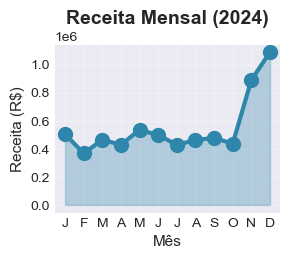

In [153]:
# 2. Evolução Mensal de Receita
ax2 = plt.subplot(2, 2, 2)
meses_num = range(1, 13)
receitas = vendas_mensais['Receita'].values
ax2.plot(meses_num, receitas, marker='o', linewidth=3, markersize=10, color='#2E86AB')
ax2.fill_between(meses_num, receitas, alpha=0.3, color='#2E86AB')
ax2.set_title('Receita Mensal (2024)', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Mês', fontsize=11)
ax2.set_ylabel('Receita (R$)', fontsize=11)
ax2.set_xticks(meses_num)
ax2.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax2.grid(True, alpha=0.3)

In [154]:
ax2.axvspan(10.5, 12.5, alpha=0.2, color='red', label='Alta Temporada')
ax2.legend()

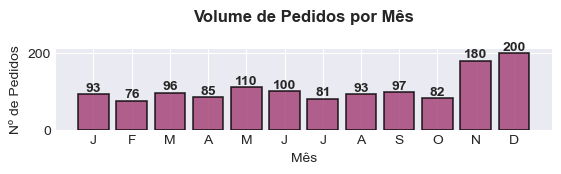

In [80]:
# 3. Volume de Pedidos Mensal
ax3 = plt.subplot(4, 1, 3)
pedidos_mes = vendas_mensais['Nº Pedidos'].values
ax3.bar(meses_num, pedidos_mes, color='#A23B72', alpha=0.8, edgecolor='black', linewidth=1.2)
ax3.set_title('Volume de Pedidos por Mês', fontsize=12, fontweight='bold', pad=20)
ax3.set_xlabel('Mês', fontsize=10)
ax3.set_ylabel('Nº de Pedidos', fontsize=10)
ax3.set_xticks(meses_num)
ax3.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
for i, v in enumerate(pedidos_mes):
    ax3.text(i+1, v, str(int(v)), ha='center', va='bottom', fontweight='bold')

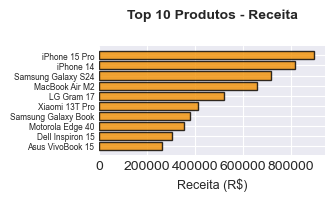

In [157]:
# 4. Top 10 Produtos por Receita
ax4 = plt.subplot(3, 2, 2)
top10_produtos = receita_por_produto.head(10)
y_pos = range(len(top10_produtos))
ax4.barh(y_pos, top10_produtos['Receita Total'], color='#F18F01', alpha=0.8, edgecolor='black')
ax4.set_yticks(y_pos)
ax4.set_yticklabels(top10_produtos.index, fontsize=6)
ax4.set_title('Top 10 Produtos - Receita', fontsize=10, fontweight='bold', pad=20)
ax4.set_xlabel('Receita (R$)', fontsize=9)
ax4.invert_yaxis()

Text(0.5, 1.0, 'Receita: Celulares vs Notebooks')

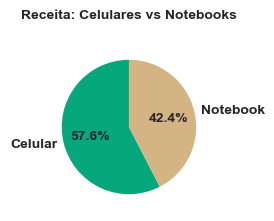

In [158]:
# 5. Celulares vs Notebooks (Receita)
ax5 = plt.subplot(2, 2, 2)
categorias = analise_categoria.index
receitas_cat = analise_categoria['Receita Total']
colors_cat = ['#06A77D', '#D4B483']
wedges, texts, autotexts = ax5.pie(receitas_cat, labels=categorias, autopct='%1.1f%%',
                                     colors=colors_cat, startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax5.set_title('Receita: Celulares vs Notebooks', fontsize=10, fontweight='bold', pad=18)

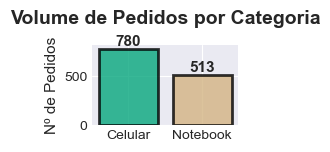

In [91]:
# 6. Celulares vs Notebooks (Volume)
ax6 = plt.subplot(4, 3, 6)
volumes_cat = analise_categoria['Nº Pedidos']
ax6.bar(categorias, volumes_cat, color=['#06A77D', '#D4B483'], alpha=0.8, edgecolor='black', linewidth=2)
ax6.set_title('Volume de Pedidos por Categoria', fontsize=14, fontweight='bold', pad=15)
ax6.set_ylabel('Nº de Pedidos', fontsize=11)
for i, v in enumerate(volumes_cat):
    ax6.text(i, v, str(int(v)), ha='center', va='bottom', fontweight='bold', fontsize=11)

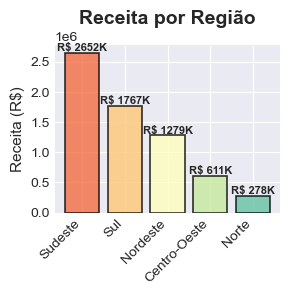

In [98]:
# 7. Receita por Região
ax7 = plt.subplot(2, 2, 3)
regioes = analise_regional.index
receitas_reg = analise_regional['Receita Total']
colors_reg = plt.cm.Spectral(np.linspace(0.2, 0.8, len(regioes)))
ax7.bar(regioes, receitas_reg, color=colors_reg, alpha=0.8, edgecolor='black', linewidth=1.2)
ax7.set_title('Receita por Região', fontsize=14, fontweight='bold', pad=15)
ax7.set_ylabel('Receita (R$)', fontsize=11)
plt.setp(ax7.xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(receitas_reg):
    ax7.text(i, v, f'R$ {v/1000:.0f}K', ha='center', va='bottom', fontweight='bold', fontsize=8)

Text(0.5, 1.0, 'Distribuição Regional (%)')

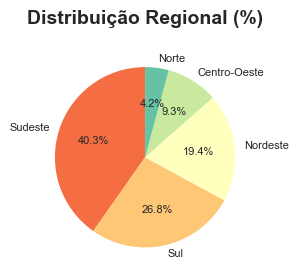

In [130]:
# 8. Distribuição Regional 
ax8 = plt.subplot(1, 2, 1)
wedges, texts, autotexts = ax8.pie(receitas_reg, labels=regioes, autopct='%1.1f%%',
                                     colors=colors_reg, startangle=90, textprops={'fontsize': 8})
ax8.set_title('Distribuição Regional (%)', fontsize=14, fontweight='bold', pad=15)

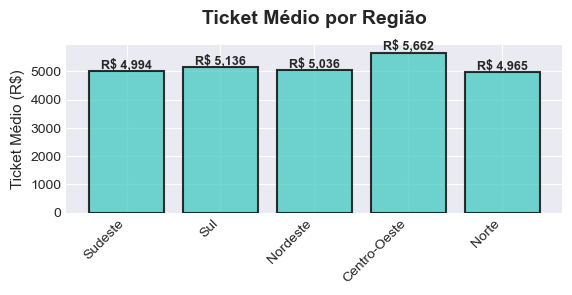

In [139]:
# 9. Ticket Médio por Região
ax9 = plt.subplot(2, 1, 2)
tickets_reg = analise_regional['Ticket Médio']
ax9.bar(regioes, tickets_reg, color='#4ECDC4', alpha=0.8, edgecolor='black', linewidth=1.5)
ax9.set_title('Ticket Médio por Região', fontsize=14, fontweight='bold', pad=15)
ax9.set_ylabel('Ticket Médio (R$)', fontsize=11)
plt.setp(ax9.xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(tickets_reg):
    ax9.text(i, v, f'R$ {v:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

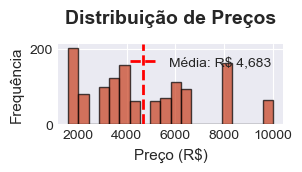

In [160]:
# 10. Distribuição de Preços dos Produtos
ax10 = plt.subplot(4, 2, 3)
ax10.hist(df['PrecoUnitario'], bins=20, color='#C73E1D', alpha=0.7, edgecolor='black')
ax10.set_title('Distribuição de Preços', fontsize=14, fontweight='bold', pad=15)
ax10.set_xlabel('Preço (R$)', fontsize=11)
ax10.set_ylabel('Frequência', fontsize=11)
ax10.axvline(df['PrecoUnitario'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: R$ {df["PrecoUnitario"].mean():,.0f}')
ax10.legend()

Text(0, 0.5, 'Nº de Pedidos')

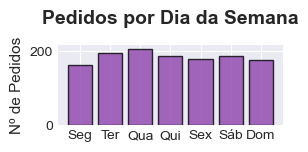

In [143]:
# 11. Pedidos por Dia da Semana
ax11 = plt.subplot(4, 2, 3)
dias_semana_pt = {'Monday': 'Seg', 'Tuesday': 'Ter', 'Wednesday': 'Qua', 
                  'Thursday': 'Qui', 'Friday': 'Sex', 'Saturday': 'Sáb', 'Sunday': 'Dom'}
df['DiaSemana_PT'] = df['DiaSemana'].map(dias_semana_pt)
ordem_dias = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
pedidos_dia = df.groupby('DiaSemana_PT')['OrderID'].count().reindex(ordem_dias)
ax11.bar(ordem_dias, pedidos_dia.values, color='#8E44AD', alpha=0.8, edgecolor='black')
ax11.set_title('Pedidos por Dia da Semana', fontsize=14, fontweight='bold', pad=15)
ax11.set_ylabel('Nº de Pedidos', fontsize=11)

Text(57.58333333333333, 0.5, 'Categoria')

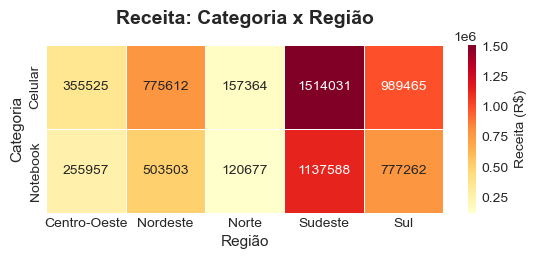

In [149]:
# 12. Heatmap: Categoria x Região
ax12 = plt.subplot(2, 1, 2)
heatmap_data = df.groupby(['Categoria', 'Regiao'])['ReceitaTotal'].sum().unstack(fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax12, 
            cbar_kws={'label': 'Receita (R$)'}, linewidths=0.5)
ax12.set_title('Receita: Categoria x Região', fontsize=14, fontweight='bold', pad=15)
ax12.set_xlabel('Região', fontsize=11)
ax12.set_ylabel('Categoria', fontsize=11)

In [150]:
plt.tight_layout()
plt.savefig('dashboard_loja_imaginaria.png', dpi=300, bbox_inches='tight')
print("Dashboard salvo como 'dashboard_loja_imaginaria.png'")
plt.show()

Dashboard salvo como 'dashboard_loja_imaginaria.png'


<Figure size 640x480 with 0 Axes>

In [151]:
print("\n" + "="*80)
print(" INSIGHTS E CONCLUSÕES - LOJA IMAGINÁRIA S.A")
print("="*80)

print("""
   PRINCIPAIS DESCOBERTAS:

    PERFORMANCE GERAL:
   → Receita total de R$ {:.2f}M em 2024
   → {:,} pedidos de {:,} clientes únicos
   → Ticket médio de R$ {:.2f} por pedido
   → Taxa de recorrência: {:.1f} pedidos por cliente

    PRODUTOS E CATEGORIAS:
   → {} é o produto mais lucrativo
   → Notebooks geram MAIOR RECEITA (produtos de ticket alto)
   → Celulares têm MAIOR VOLUME de pedidos (mais acessíveis)
   → Estratégia: balancear mix de produtos premium e populares

    SAZONALIDADE MARCANTE:
   → NOVEMBRO: Pico de vendas (Black Friday)
   → DEZEMBRO: Maior volume de pedidos do ano (Natal)
   → Crescimento médio de {:.1f}% de Nov para Dez
   → Oportunidade: preparar estoque e marketing para Q4

    PERFORMANCE REGIONAL:
   → SUDESTE concentra {:.1f}% da receita (maior mercado)
   → SUL tem o segundo melhor desempenho
   → NORTE representa apenas {:.1f}% (oportunidade de crescimento)
   → Ticket médio varia significativamente entre regiões

    COMPORTAMENTO DO CLIENTE:
   → Clientes fazem em média {:.1f} pedidos por ano
   → Ticket médio por cliente: R$ {:.2f}
   → Potencial para programas de fidelidade e upsell

══════════════════════════════════════════════════════════════════════════════

  RECOMENDAÇÕES ESTRATÉGICAS:

   VENDAS E MARKETING:
   • Intensificar campanhas em Out/Nov para maximizar Black Friday
   • Criar bundles de celular + notebook para aumentar ticket médio
   • Investir em marketing nas regiões Norte e Centro-Oeste
   
   ESTOQUE E LOGÍSTICA:
   • Aumentar estoque de produtos top em 30% antes da alta temporada
   • Otimizar logística no Sudeste (40% das vendas)
   • Considerar centros de distribuição regionais
   
   EXPERIÊNCIA DO CLIENTE:
   • Programa de fidelidade para aumentar recorrência
   • Cashback ou descontos progressivos para clientes VIP
   • Melhorar jornada de compra para aumentar conversão
   
   PRECIFICAÇÃO:
   • Testar promoções progressivas (maior desconto em Q4)
   • Criar kits promocionais celular + acessórios
   • Oferecer parcelamento atrativo para notebooks

══════════════════════════════════════════════════════════════════════════════
""".format(
    receita_total/1000000,
    num_pedidos, num_clientes,
    ticket_medio,
    num_pedidos/num_clientes,
    produto_top,
    ((vendas_mensais.loc[12, 'Receita'] - vendas_mensais.loc[11, 'Receita']) / vendas_mensais.loc[11, 'Receita'] * 100),
    (analise_regional.loc['Sudeste', 'Receita Total'] / receita_total * 100),
    (analise_regional.loc['Norte', 'Receita Total'] / receita_total * 100),
    num_pedidos/num_clientes,
    ticket_medio_cliente
))

print("="*80)
print(" ANÁLISE CONCLUÍDA COM SUCESSO!")


 INSIGHTS E CONCLUSÕES - LOJA IMAGINÁRIA S.A

   PRINCIPAIS DESCOBERTAS:

    PERFORMANCE GERAL:
   → Receita total de R$ 6.59M em 2024
   → 4 pedidos de 642 clientes únicos
   → Ticket médio de R$ 5094.34 por pedido
   → Taxa de recorrência: 0.0 pedidos por cliente

    PRODUTOS E CATEGORIAS:
   → iPhone 15 Pro é o produto mais lucrativo
   → Notebooks geram MAIOR RECEITA (produtos de ticket alto)
   → Celulares têm MAIOR VOLUME de pedidos (mais acessíveis)
   → Estratégia: balancear mix de produtos premium e populares

    SAZONALIDADE MARCANTE:
   → NOVEMBRO: Pico de vendas (Black Friday)
   → DEZEMBRO: Maior volume de pedidos do ano (Natal)
   → Crescimento médio de 22.2% de Nov para Dez
   → Oportunidade: preparar estoque e marketing para Q4

    PERFORMANCE REGIONAL:
   → SUDESTE concentra 40.3% da receita (maior mercado)
   → SUL tem o segundo melhor desempenho
   → NORTE representa apenas 4.2% (oportunidade de crescimento)
   → Ticket médio varia significativamente entre regiõ